In [1]:
%cd ..

/Users/canali/Documents/cvpr/cvpr_cw


In [3]:
!ls

__pycache__                descriptors
cvpr_compare.py            descriptors.py
cvpr_computedescriptors.py extractRandom.py
cvpr_visualsearch.py       lab3.ipynb
cw.ipynb                   python


In [ ]:
from cvpr_computedescriptors import cvpr_compute_descriptors


compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

# Compute the descriptors
# Options: joint_color_hist
#          global_color_hist
#          color_hist
#          color
#          random
#          sift
#          grid_descriptor
compute.compute_descriptors('color')
compute.compute_descriptors('joint_color_hist', bins=16)
compute.compute_descriptors('global_color_hist')
compute.compute_descriptors('color_hist')
compute.compute_descriptors('random')
compute.compute_descriptors('sift')
compute.compute_descriptors('grid_descriptor',bins=16)
compute.compute_descriptors('color_hist',bins=16)

In [3]:
from cvpr_computedescriptors import cvpr_compute_descriptors


compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')
compute.compute_descriptors('edge_grid_descriptor',bins=16)


Computing edge_grid_descriptor descriptors...


In [10]:
import numpy as np
import glob
descriptor_paths = glob.glob('python/descriptors/sift/' + "*.npy", recursive=True)
np.load(descriptor_paths[3]).shape

(40320,)

In [4]:
from cvpr_computedescriptors import cvpr_compute_descriptors


compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

compute.compute_descriptors('sift')
visual_vocabulary, kmeans = compute.build_visual_vocab('python/descriptors/sift/', dictionary_size=128)
compute.compute_bovw('python/descriptors/sift/', kmeans, dictionary_size=128)

Computing sift descriptors...
Bulding BoVW with 128 clusters...


100%|██████████| 591/591 [00:00<00:00, 1521.54it/s]


Clustering...


/Users/canali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Computing BoVW histograms...


100%|██████████| 591/591 [00:01<00:00, 445.33it/s]


In [ ]:
from cvpr_computedescriptors import cvpr_compute_descriptors


compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

compute.compute_descriptors('sift_keypoints')

In [2]:
from cvpr_computedescriptors import cvpr_compute_descriptors
compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

compute.compute_descriptors('color_grid_descriptor',bins=16)

Computing color_grid_descriptor descriptors...


In [4]:
from cvpr_computedescriptors import cvpr_compute_descriptors
compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

compute.compute_descriptors('color_hist',bins=16)

Computing color_hist descriptors...


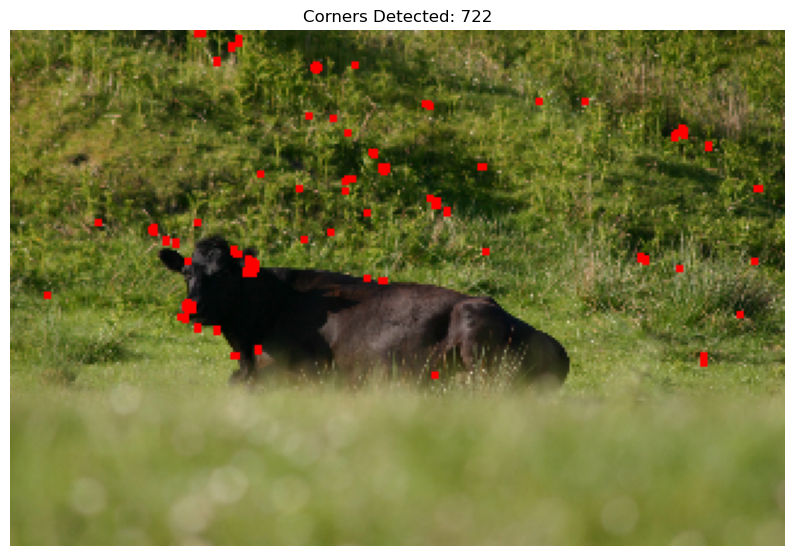

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def harris_corner_detector( img, block_size=2, ksize=3, k=0.04):
    # Convert the image to grayscale for corner detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Harris corner detection
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    
    # Dilate corner points for marking them
    dst = cv2.dilate(dst, None)

    # Create a copy of the original image (not grayscale) to mark the corners
    corner_img = img.copy()

    # Threshold for an optimal value, mark the corners in red on the original image
    corner_img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Assign red color to corner regions

    # Count the number of corners detected (you can also return other statistics)
    num_corners = np.sum(dst > 0.01 * dst.max())

    return num_corners, corner_img

test_img = cv2.imread('MSRC_ObjCategImageDatabase_v2/Images/5_5_s.bmp')
num_corners, corner_img = harris_corner_detector(test_img)
corner_img_rgb = cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB)

# Show the image with corners marked
plt.figure(figsize=(10, 10))
plt.imshow(corner_img_rgb)
plt.axis('off')  # Hide the axis
plt.title(f'Corners Detected: {num_corners}')
plt.show()

In [3]:
import glob
glob.glob(vs.IMAGE_FOLDER)

[]

In [32]:
from cvpr_visualsearch import VisualSearch

vs = VisualSearch('python/descriptors/', 'MSRC_ObjCategImageDatabase_v2/Images/', 'performance')

# sift_descriptors = vs.load_descriptors('sift_bovw')
color_descriptors = vs.load_descriptors('color_grid_descriptor')
edge__grid_descriptors = vs.load_descriptors('edge_grid_descriptor')
# query_basename, retreived_images_sorted = vs.visual_search(query_image_path='MSRC_ObjCategImageDatabase_v2/Images/5_20_s.bmp', distance_metric='euclidean', pca=False)
query_basename, retreived_images_sorted = vs.visual_search_custom_descriptors(query_image_path='MSRC_ObjCategImageDatabase_v2/Images/18_20_s.bmp',distance_metric='euclidean', pca=False, descriptors_dicts=[edge__grid_descriptors, color_descriptors])

Performing visual search using multiple descriptors


In [28]:
from cvpr_visualsearch import VisualSearch

vs = VisualSearch('python/descriptors/', 'MSRC_ObjCategImageDatabase_v2/Images/', 'performance')

sift_descriptors = vs.load_descriptors('sift_bovw')
# color_descriptors = vs.load_descriptors('color_grid_descriptor')
query_basename, retreived_images_sorted = vs.visual_search(query_image_path='MSRC_ObjCategImageDatabase_v2/Images/18_20_s.bmp' ,distance_metric='euclidean', pca=False)
# query_basename, retreived_images_sorted = vs.visual_search_custom_descriptors(distance_metric='euclidean', pca=False, descriptors_dicts=[sift_descriptors, color_descriptors])

Performing visual search using sift_bovw descriptors


In [11]:
len(vs.descriptors_dict['10_10_s'])

591

In [5]:
vs.descriptors_dict['10_10_s'].shape

(12288,)

For top-10 Precision: 0.1, Recall: 0.034482758620689655


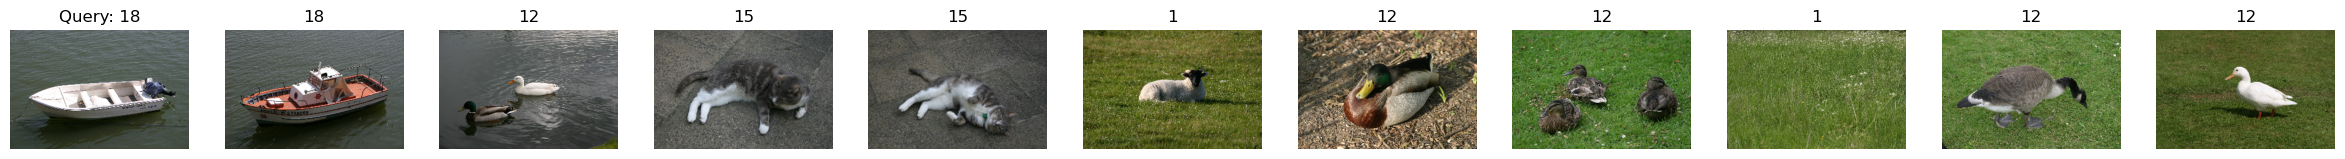

In [33]:
import matplotlib.pyplot as plt
import cv2
n = 10
f, axarr = plt.subplots(1, n+1, figsize=(30, 15)) 
DATASET_FOLDER = 'MSRC_ObjCategImageDatabase_v2/Images/'
# Left-most image is the query image
i = 0
query_label = {}
search_labels = []
precision, recall = vs.calculate_precision_recall(query_basename, retreived_images_sorted[1:], n)
print(f'For top-{n} Precision: {precision}, Recall: {recall}')
for image_dict in retreived_images_sorted[:n+1]:
    
    # label_path = LABELS_FOLDER + image_dict['image_name'].split('.')[0] + '_GT.json'
    # with open(label_path) as json_file:
    #     data = json.load(json_file)
    #     class_vector = list(data.values())

    #     if i == 0:
    #         for j in range(23):
    #             if class_vector[j] != 0:
    #                 query_label[index_to_class_name[j]]= class_vector[j]
    #         # query_label = list(data.values())
    #     else:
    #         label_dict = {}
    #         for j in range(23):
    #             if class_vector[j] != 0:
    #                 label_dict[index_to_class_name[j]]= class_vector[j]
    #         search_labels.append(label_dict)
    #     # dist = calculate_distance(np.array(query_label), np.array(class_vector)) labels distance

        

    image_path = DATASET_FOLDER + image_dict['image_name'] + '.bmp'
    img = cv2.imread(image_path)  # Load the image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    axarr[i].imshow(img)  # Display the image
    image_label = image_dict['image_name'].split('_')[0]
    if i == 0:
        axarr[i].set_title(f'Query: {image_label}')
        # axarr[i].set_title(f'Query: {str(image_dict["image_name"]).split('_')[0]}')
    else:
        axarr[i].set_title(f'{str(image_label)}')
        # axarr[i].set_title(f'{str(image_dict["image_name"]).split('_')[0]}')

    axarr[i].axis('off')  # Turn off axis if you don't want the grid lines
    i+=1
plt.show()

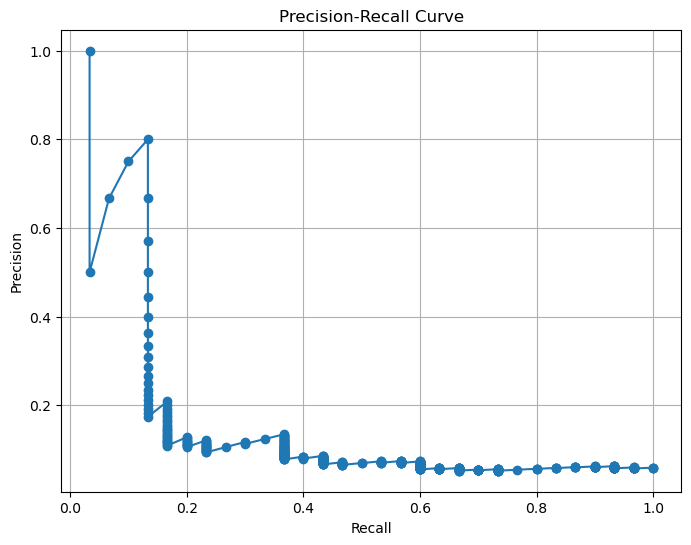

Average Precision: 0.17937946460990797


In [44]:
precision_values = []
recall_values = []
for i in range(1, 512):
    precision_value, recall_value = vs.calculate_precision_recall(query_basename, retreived_images_sorted, top_n=i)
    precision_values.append(precision_value)
    recall_values.append(recall_value)
# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()
average_precision = vs.calculate_average_precision(query_basename, retreived_images_sorted)
print(f'Average Precision: {average_precision}')

0.5882500499587517